In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Data

## Import

In [4]:
dataset = pd.read_csv('../Regression-Data.csv')
dataset.sample(5)

,AT,V,AP,RH,PE
9290,22.29,61.27,1019.05,58.23,449.81
9124,4.00,39.90,1008.46,97.21,490.68
2349,10.16,41.79,1021.35,52.40,472.75
6088,17.99,50.59,1015.90,77.28,462.20
3108,10.05,40.46,1018.71,67.38,469.06


In [5]:
dataset.describe(include='all')

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [9]:
X.shape, y.shape

((9568, 4), (9568,))

## Train test split

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Multiple Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [16]:
mlr_y_pred = mlr.predict(X_test)

# Polynomial Regression

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [33]:
degree = 4
poly = make_pipeline(PolynomialFeatures(degree=degree),LinearRegression())
poly.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [34]:
poly_y_pred = poly.predict(X_test)

# SVR

## Feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
# Scaler for X
sc_X = StandardScaler()

# Scaler for y
sc_y = StandardScaler()

In [42]:
# Fit and transform X_train and y_train with scaler
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train.reshape(-1,1)) # Needs to be 2D

In [38]:
from sklearn.svm import SVR

In [44]:
svr = SVR(kernel='rbf')
svr.fit(X_train_sc, y_train_sc)

/opt/anaconda3/envs/fastai/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [47]:
# Prediction
svr_y_pred = sc_y.inverse_transform(svr.predict(sc_X.transform(X_test)).reshape(-1,1))

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [54]:
tree_y_pred = tree.predict(X_test)

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
forest = RandomForestRegressor(n_estimators=10,random_state=0)
forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [60]:
forest_y_pred = forest.predict(X_test)

# Models Comparison

Text(0.5, 0, 'True')

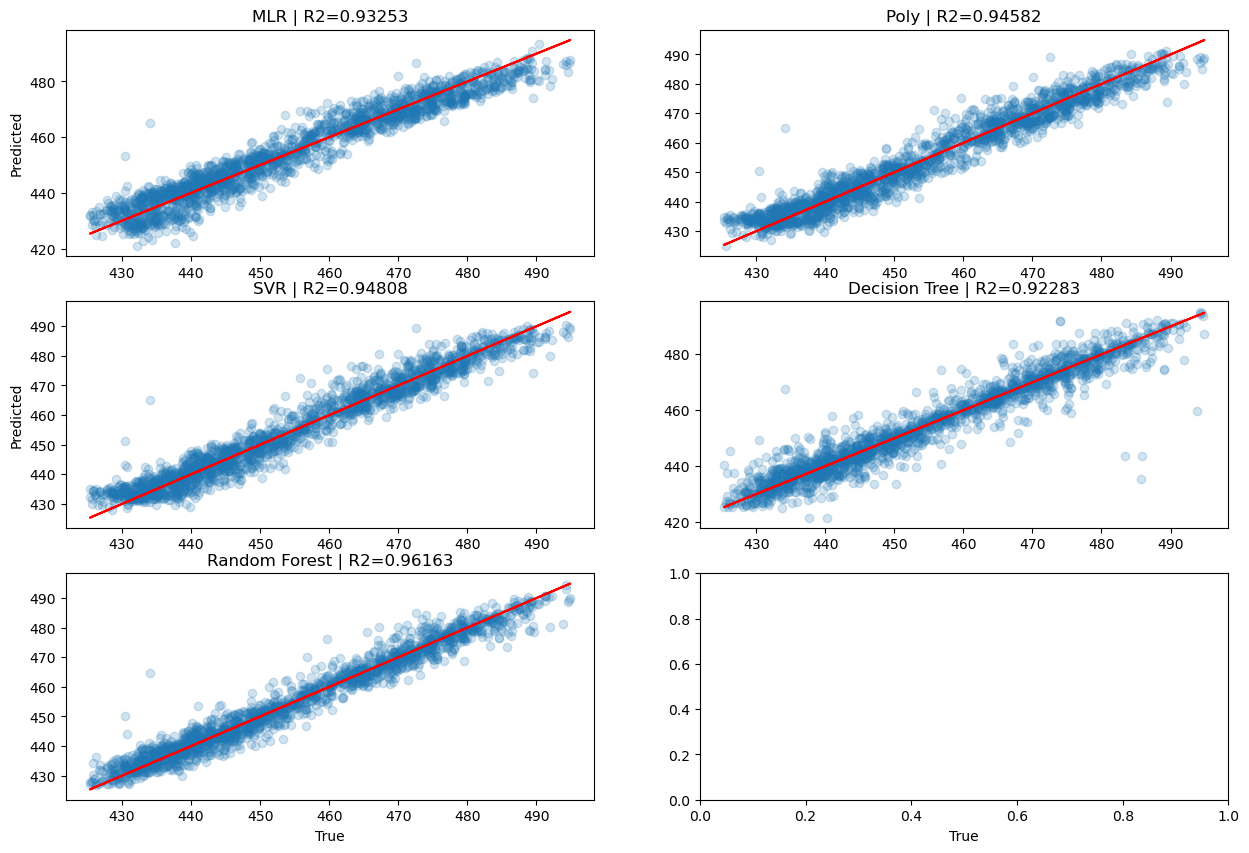

In [77]:
fig, axs = plt.subplots(3,2,figsize=(15,10))

axs[0,0].scatter(y_test, mlr_y_pred,alpha=0.2)
axs[0,0].plot(y_test,y_test,color='r')
axs[0,0].set_title(f'MLR | R2={r2_score(y_test,mlr_y_pred):.5f}')
axs[0,0].set_ylabel('Predicted')

axs[0,1].scatter(y_test, poly_y_pred,alpha=0.2)
axs[0,1].plot(y_test,y_test,color='r')
axs[0,1].set_title(f'Poly | R2={r2_score(y_test,poly_y_pred):.5f}')

axs[1,0].scatter(y_test, svr_y_pred,alpha=0.2)
axs[1,0].plot(y_test,y_test,color='r')
axs[1,0].set_title(f'SVR | R2={r2_score(y_test,svr_y_pred):.5f}')
axs[1,0].set_ylabel('Predicted')

axs[1,1].scatter(y_test, tree_y_pred,alpha=0.2)
axs[1,1].plot(y_test,y_test,color='r')
axs[1,1].set_title(f'Decision Tree | R2={r2_score(y_test,tree_y_pred):.5f}')

axs[2,0].scatter(y_test, forest_y_pred,alpha=0.2)
axs[2,0].plot(y_test,y_test,color='r')
axs[2,0].set_title(f'Random Forest | R2={r2_score(y_test,forest_y_pred):.5f}')
axs[2,0].set_xlabel('True')

axs[2,1].set_xlabel('True')

In [88]:
my_dict={f'{n}':r2_score(y_test,i) for n,i in zip(['MLR','Poly','SVR','Tree','Forest'],
                                        [mlr_y_pred,poly_y_pred,svr_y_pred,tree_y_pred,forest_y_pred])}
sorted_dict = dict(sorted(my_dict.items(), key=lambda item: item[1]*-1))
sorted_dict

{'Forest': 0.9616252843810529,
 'SVR': 0.9480795111869856,
 'Poly': 0.945819368318529,
 'MLR': 0.9325315554761303,
 'Tree': 0.9228349015829475}